In [3]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=a93bc4e48f62c4aeea679710754bd0fec9a982f189d1c1c7ae504050191c2254
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Fuzzification - Define linguistic variables and fuzzy sets
data_redundancy = ctrl.Antecedent(np.arange(0, 101, 1), 'Data Redundancy')
degradation_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Degradation Level')
error_history = ctrl.Antecedent(np.arange(0, 101, 1), 'Error History')

likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'Likelihood')

data_redundancy['Low'] = fuzz.trimf(data_redundancy.universe, [0, 25, 50])
data_redundancy['Moderate'] = fuzz.trimf(data_redundancy.universe, [25, 50, 75])
data_redundancy['High'] = fuzz.trimf(data_redundancy.universe, [50, 75, 100])

degradation_level['Low'] = fuzz.trimf(degradation_level.universe, [0, 25, 50])
degradation_level['Moderate'] = fuzz.trimf(degradation_level.universe, [25, 50, 75])
degradation_level['High'] = fuzz.trimf(degradation_level.universe, [50, 75, 100])

error_history['Low'] = fuzz.trimf(error_history.universe, [0, 25, 50])
error_history['Moderate'] = fuzz.trimf(error_history.universe, [25, 50, 75])
error_history['High'] = fuzz.trimf(error_history.universe, [50, 75, 100])

likelihood['Low'] = fuzz.trimf(likelihood.universe, [0, 25, 50])
likelihood['Moderate'] = fuzz.trimf(likelihood.universe, [25, 50, 75])
likelihood['High'] = fuzz.trimf(likelihood.universe, [50, 75, 100])

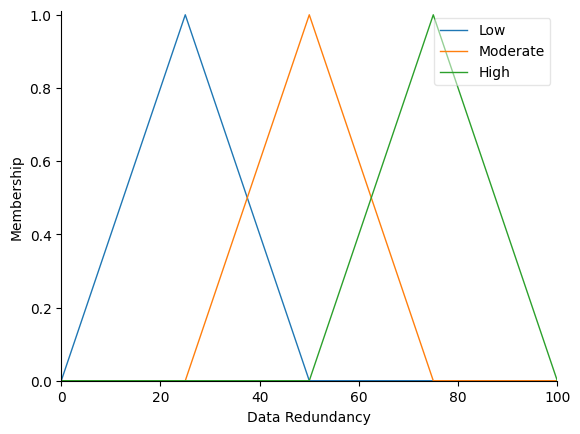

In [5]:
data_redundancy.view()

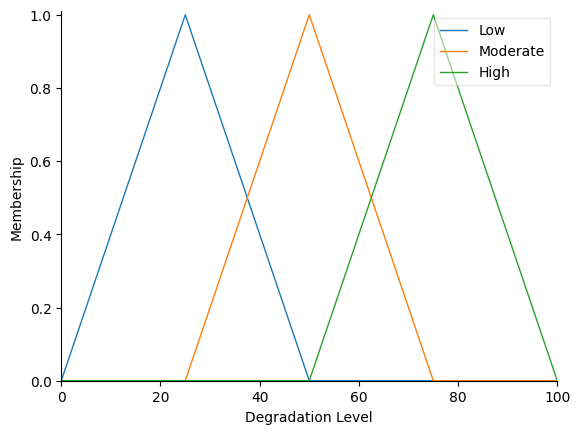

In [6]:
degradation_level.view()

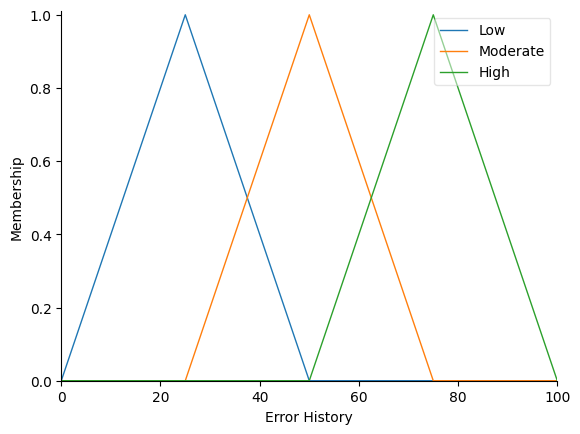

In [7]:
error_history.view()

In [8]:
# Balanced rules
rule1 = ctrl.Rule(data_redundancy['Low'] & degradation_level['Low'] & error_history['Low'], likelihood['Low'])
rule2 = ctrl.Rule(data_redundancy['Moderate'] & degradation_level['Moderate'] & error_history['Moderate'], likelihood['Moderate'])
rule3 = ctrl.Rule(data_redundancy['High'] & degradation_level['High'] & error_history['High'], likelihood['High'])
rule4 = ctrl.Rule(data_redundancy['Low'] & degradation_level['High'] & error_history['Low'], likelihood['Low'])
rule5 = ctrl.Rule(data_redundancy['High'] & degradation_level['Low'] & error_history['High'], likelihood['Moderate'])
rule6 = ctrl.Rule(data_redundancy['Moderate'] & degradation_level['High'] & error_history['Low'], likelihood['Moderate'])
rule7 = ctrl.Rule(data_redundancy['Low'] & degradation_level['Moderate'] & error_history['High'], likelihood['High'])
rule8 = ctrl.Rule(data_redundancy['High'] & degradation_level['Moderate'] & error_history['Low'], likelihood['Low'])
rule9 = ctrl.Rule(data_redundancy['Moderate'] & degradation_level['High'] & error_history['High'], likelihood['High'])
rule10 = ctrl.Rule(data_redundancy['Low'] & degradation_level['Low'] & error_history['High'], likelihood['Moderate'])

In [9]:
# Defuzzification
likelihood_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
likelihood_evaluation = ctrl.ControlSystemSimulation(likelihood_ctrl)

In [10]:
input_data = {
    'Data Redundancy': 80,
    'Degradation Level': 40,
    'Error History': 60
}



likelihood_evaluation.inputs(input_data)
likelihood_evaluation.compute()

print("Likelihood:", likelihood_evaluation.output['Likelihood'])

Likelihood: 49.99999999999996


In [ ]:
#User Interface
def user_interface():
    while True:
        print("\n===== Fuzzy Logic Error Detection and Correction System =====")
        print("1. Perform Error Detection and Correction")
        print("2. Exit")

        choice = input("Enter your choice (1/2): ")

        if choice == '1':
            perform_error_detection_correction()
        elif choice == '2':
            print("Exiting the system. Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

def input_data_characteristics():
    while True:
        try:
            data_redundancy = float(input("Enter Data Redundancy (0-100): "))
            if 0 <= data_redundancy <= 100:
                likelihood_evaluation.input['Data Redundancy'] = data_redundancy
                break
            else:
                print("Error: Please enter a value between 0 and 100.")
        except ValueError:
            print("Error: Please enter a valid numerical value.")

    while True:
        try:
            degradation_level = float(input("Enter Degradation Level (0-100): "))
            if 0 <= degradation_level <= 100:
                likelihood_evaluation.input['Degradation Level'] = degradation_level
                break
            else:
                print("Error: Please enter a value between 0 and 100.")
        except ValueError:
            print("Error: Please enter a valid numerical value.")

    while True:
        try:
            error_history = float(input("Enter Error History (0-100): "))
            if 0 <= error_history <= 100:
                likelihood_evaluation.input['Error History'] = error_history
                break
            else:
                print("Error: Please enter a value between 0 and 100.")
        except ValueError:
            print("Error: Please enter a valid numerical value.")


def perform_error_detection_correction():
    input_data_characteristics()  # Set input values
    likelihood_evaluation.compute()
    print("\n===== Error Detection Result =====")
    print("Likelihood of Errors:", likelihood_evaluation.output['Likelihood'])

    likelihood_value = likelihood_evaluation.output['Likelihood']

    if likelihood_value == 0:
      print("No errors detected.")
    elif 0 < likelihood_value <= 25:
      print("Low likelihood of errors. No action needed.")
    elif 25 < likelihood_value <= 75:
      print("Moderate likelihood of errors. Monitor the system.")
    elif 75 < likelihood_value <= 100:
      print("High likelihood of errors. Implement error correction strategies.")

# Run the user interface
user_interface()


===== Fuzzy Logic Error Detection and Correction System =====
1. Perform Error Detection and Correction
2. Exit
Enter your choice (1/2): 1
Enter Data Redundancy (0-100): 20
Enter Degradation Level (0-100): 95
Enter Error History (0-100): 20

===== Error Detection Result =====
Likelihood of Errors: 24.999999999999993
Low likelihood of errors. No action needed.

===== Fuzzy Logic Error Detection and Correction System =====
1. Perform Error Detection and Correction
2. Exit
Enter your choice (1/2): 50
Invalid choice. Please try again.

===== Fuzzy Logic Error Detection and Correction System =====
1. Perform Error Detection and Correction
2. Exit
Enter your choice (1/2): 95
Invalid choice. Please try again.

===== Fuzzy Logic Error Detection and Correction System =====
1. Perform Error Detection and Correction
2. Exit
Enter your choice (1/2): 1
Enter Data Redundancy (0-100): 50
Enter Degradation Level (0-100): 95
Enter Error History (0-100): 20

===== Error Detection Result =====
Likelihoo